In [1]:
from DRP_rotation_curve import extract_data, extract_Pipe3d_data
from rotation_fitfunctions import find_phi, find_incl, find_axis_ratio
from astropy.table import Table
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

In [2]:
#where the data lives
MANGA_FOLDER = '/scratch/kdougla7/data/SDSS/dr17/manga/spectro/'
VEL_MAP_FOLDER = MANGA_FOLDER + 'analysis/v3_1_1/3.1.0/HYB10-MILESHC-MASTARSSP/'
DRP_FILENAME = MANGA_FOLDER + 'redux/v3_1_1/' + 'drpall-v3_1_1.fits'

In [3]:
#reading in DRP_all
DRP_table = Table.read(DRP_FILENAME, 'MANGA')

DRP_index = {}

for i in range(len(DRP_table)):
    galaxy_ID = DRP_table['plateifu'][i]

    DRP_index[galaxy_ID] = i


In [4]:
full_fail = Table.read('/scratch/lstroud3/RotationCurves/failed_objects_table.fits')

In [33]:
t = full_fail[full_fail['fitting code']==222]
t[t['visual code']==3.2]['plateifu','visual code'].show_in_notebook()

idx,plateifu,visual code
0,11955-12702,3.2
1,11977-12704,3.2
2,11982-12703,3.2
3,12069-12702,3.2
4,12769-12705,3.2
5,7958-12703,3.2
6,7972-6102,3.2
7,7981-12703,3.2
8,8146-9101,3.2
9,8148-6102,3.2


In [92]:
#galaxy being checked
gal_ID = '8252-12701' #7972-6102, 8148-6102, 8252-12701 is (27,27),8146-9101 (35,30)

In [85]:
#reading in velocity map and getting center/phi
maps = extract_data(VEL_MAP_FOLDER,gal_ID,['Ha_vel', 'r_band', 'Ha_flux', 'Ha_sigma'])
SN_map = maps['Ha_flux'] * np.sqrt(maps['Ha_flux_ivar'])
vmap_mask = maps['Ha_vel_mask'] + (SN_map < 5)
maps['vmasked'] = ma.array(maps['Ha_vel'], mask=vmap_mask)
maps['ivarmasked'] = ma.array(maps['Ha_vel_ivar'], mask=vmap_mask)
maps['rbandmasked'] = ma.array(maps['r_band'], mask = vmap_mask)
i_DRP = DRP_index[gal_ID]
shape = maps['vmasked'].shape
center = np.unravel_index(ma.argmax(maps['rbandmasked']), shape)



In [93]:
center = (27,27)
phi = DRP_table['nsa_elpetro_phi'][i_DRP] 
new_phi = find_phi(center, phi, maps['vmasked'])
phi = DRP_table['nsa_elpetro_phi'][i_DRP] 
phi *= np.pi/180
print(phi,new_phi)

0.19679110915011663
0.19679110915011663 0.19679110915011663


In [31]:
maps['vmasked']-= maps['vmasked'][center]

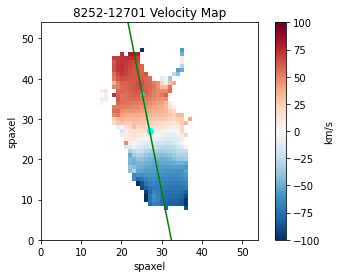

In [94]:

plt.imshow(maps['vmasked'],origin='lower',cmap='RdBu_r',vmax = 100,vmin=-100)
cbar = plt.colorbar()
plt.plot(center[0],center[1],marker='o',color='cyan')
plt.quiver([center[0]],[center[1]],[-np.sin(new_phi)],[np.cos(new_phi)],scale=5,color='cyan')
y= np.linspace(0,shape[0])
plt.plot(-((np.tan(phi))*(y-center[1]))+center[0],y,color='green')
plt.xlim(0,shape[0])
plt.ylim(0,shape[1])
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(gal_ID+' Velocity Map')

cbar.set_label('km/s')


In [312]:
x['new_x0'][x_ind[gal_ID]] = center[0]
x['new_y0'][x_ind[gal_ID]] = center[1]

KeyError: '11021-12702'

In [41]:
x = t[t['visual code']==2]
x['new_x0'] = np.nan
x['new_y0'] = np.nan

In [42]:
x_ind = {}
for i in range(len(x)):
    gal = x['plateifu'][i]
    x_ind[gal] = i

In [300]:
x['plateifu','new_x0','new_y0'].show_in_notebook()

idx,plateifu,new_x0,new_y0
0,10495-12704,39.0,36.0
1,10515-3703,nan,nan
2,10841-12705,nan,nan
3,10845-6101,nan,nan
4,11018-12701,38.0,38.0
5,11743-12701,nan,nan
6,11751-12702,37.0,38.0
7,11754-6102,nan,nan
8,11758-6103,31.0,27.0
9,11823-12702,40.0,40.0


In [ ]:
'''




0	10495-12704	39.0	36.0
1	10515-3703	20.0	25.0
2	10841-12705	37	37
3	10845-6101	30	30
4	11018-12701	38.0	38.0
5	11743-12701	37	37
6	11751-12702	37.0	38.0
7	11021-12702	35	40
8	11758-6103	31.0	27.0
9	11823-12702	40.0	40.0
10	11824-12702	37.0	38.0
13	11832-12702	37.0	38.0
14	11865-12705	35.0	37.0
15	11947-12703	40	40
16	11978-12701	35.0	37.0
17	12488-6102	27	27
18	12651-12701	35.0	36.0
19	8088-12704	36	36
20	8240-12705	45.0	45.0
21	8252-6103	28.0	28.0
22	8438-12705	38.0	38.0
23	8551-6104	25.0	25.0
24	8570-6104	25.0	25.0
25	8613-12701	40.0	37.0
26	8626-1902	17.0	17.0
27	8651-3702	20.0	23.0
28	8711-12701	37.0	37.0
29	8950-12705	36	36
30	9037-9102	38.0	37.0
31	9046-12705	30.0	35.0
32	9498-12703	38.0	38.0
33	9872-6103	28.0	28.0
34	9890-12705	40.0	35.0
35	9891-12704	36.0	39.0"""





In [13]:
new_table = Table.read('/scratch/lstroud3/RotationCurves/Images/NFW/centerfix.fits')

In [7]:
new_table[new_table['fit flag'] >= 0].show_in_notebook()

idx,plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],rho bulge,R bulge,sigma disk,R disk,rho halo,R halo,incl,phi,x0,y0,vsys,rho bulge err,R bulge err,sigma disk err,R disk err,rho halo err,R halo err,incl err,phi err,x0 err,y0 err,vsys err,chi2,fit flag
0,10495,12704,10495-12704,1-45208,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,124.272419897,48.312047545,171.116153862,33.8222169927,124.27242,48.312048,0.0553039,12,10801.0,0,28.3706,62.947,ma154,34,6,11027,124.45808,47.83128,1.03792,1.05208,1.13793,1.73333,1.89266,1.97109,0.68591,0.890614,0.901823,58546,58547,58547,2.69623,2.65694,2.63439,2.6212,2336,0,0,1,plateTargets-1.par,6083,J081705.39+481843.4,127,169,0,0.054592,0.0251435,0.0335376,0.050353,0.0550878,0.0248908,0.0344239,0.609726,-999.0,0.382007,0.421139,0.667285,0.796579,-999.0,0.357456,0.391496,125,1345,6,v1_0_1,48141,-999,0.054592,0.0548653,-16.6186 .. -21.0321,-16.9702 .. -21.0717,295.158 .. 530.743,19353200000.0,20756700000.0,0.429259,9.21732,0.460477 .. 0.0821526,6.3595,4.80028,9.98259 .. 879.539,2.82414 .. 0.00102897,14.655 .. 848.129,3.06977 .. 0.00166519,0.350966,0.676839,9.25443,6.74763,10.3367 .. 826.14,3.51855 .. 0.0195912,0.06631475851876856,2.7891841688892276,1582.501529121807,1.4942576291652232,-0.9831724925611668,999.6799541072485,0.6262090883098702,0.3874472783379226,38.127862452638496,35.63400911714972,-7.142017913160495,0.010702194315542765,18.464105179832824,30.881428390293756,0.37488653807365174,0.0030425571931575524,55.52318774282925,0.0015565646580279657,0.0010934343573793335,0.019509210050622137,0.016911396155932755,0.2137663253606715,96.4406654990069,25.0
1,10845,6101,10845-6101,1-60334,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,149.593812964,1.58470921575,237.089920178,41.3331958786,149.59381,1.5847092,0.0206065,12,10800.9,0,21.5987,49.151,ma037,21,1,11301,149.23582,2.9957457,1.16914,1.19243,1.23266,1.30136,1.54017,1.67429,0.722841,0.912725,0.923726,58582,58582,58583,2.61389,2.61647,2.61991,2.61901,4224,0,0,1,plateTargets-1.par,7330,J095822.50+013504.9,61,61,0,0.027746605,0.019181097,0.0263518,0.03844046,0.042664375,0.018164553,0.027363025,0.67973006,-999.0,-999.0,-999.0,-999.0,-999.0,1.3392286,0.62496454,0.6692832,180,1907,2,v1_0_1,63948,-999,0.027746605,0.027150676,-15.634673 .. -19.534174,-15.796635 .. -19.511213,613.91003 .. 716.8131,4121384400.0,4502634500.0,0.58990014,26.347229,0.17033687 .. 0.030389413,6.094013,5.2177005,24.984718 .. 891.5158,64.25798 .. 0.0024701862,26.188236 .. 929.8171,59.46958 .. 0.002754182,0.3884215,1.24141,31.123688,6.877361,22.607986 .. 939.3456,53.412045 .. 0.017484456,3.019326634390784,0.46516232153043924,302.11885737427957,1.741869313859179,0.4922511695516562,3.046641084458788,0.23700928032479074,3.8574065355798077,26.08465723390917,26.83804484161975,3.3662615710571973,0.010702194315542765,18.464105179832824,30.881428390293756,0.37488653807365174,0.017663524930453072,0.026794218260022915,0.00380588332907667,0.0017192597769235284,0.04955683776543595,0.04095833

In [15]:
nfw = Table.read('/scratch/lstroud3/RotationCurves/Images/NFW/fulltable.fits')

nfw_index = {}
new_ind = {}

for i in range(len(new_table)):
    gal = new_table['plateifu'][i]
    new_ind[gal] = i

for i in range(len(nfw)):
    gal = nfw['plateifu'][i]
    nfw_index[gal] = i
for gal_ID in new_table['plateifu']:
    nfwi = nfw_index[gal_ID]
    newi = new_ind[gal_ID]
    nfw[nfwi] = new_table[newi]


In [16]:
nfw.write('/scratch/lstroud3/RotationCurves/Images/NFW/fulltable.fits', overwrite=True)


In [60]:
fail_in = {}
for i in range(len(full_fail)):
    gal = full_fail['plateifu'][i]
    fail_in[gal] = i
for gal_ID in new_table['plateifu']:
    fail = fail_in[gal_ID]
    newi = new_ind[gal_ID]
    if new_table['fit flag'][newi] >= 0:
        full_fail['Burkert chi2'][fail] = new_table['chi2'][newi]
        if new_table['chi2'][newi] <=50:
            full_fail['fitting code'][fail] -= 2
        else:
            full_fail['fitting code'][fail] -= 1
        full_fail['visual code'][fail] = np.nan


In [62]:
full_fail['plateifu','visual code','fitting code'].show_in_notebook()
full_fail.write('/scratch/lstroud3/RotationCurves/failed_objects_table.fits', overwrite = True)

In [74]:
test = Table([[1,0,3]],names=['a'])
test['b'] = np.nan
test['b'][0] = 2
test['b'][2] = 5
test.sort('b')
print(test)

 a   b 
--- ---
  1 2.0
  3 5.0
  0 nan


 a   b 
--- ---
  1 2.0
  0 nan
  3 nan
